In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

37.041628277075134 % Clase SI Cancelado
62.958371722924866 % Clase NO Cancelado


(119390, 32)

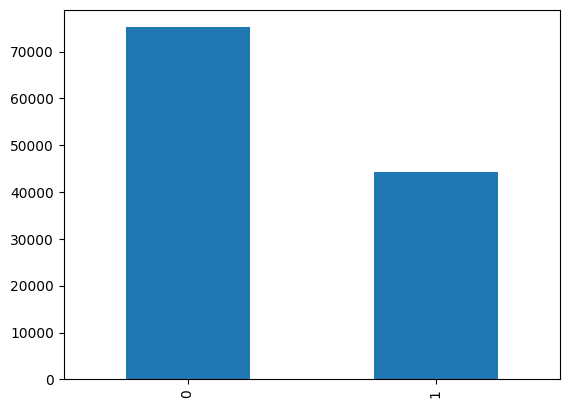

In [17]:
raw_data = pd.read_csv('hotel_bookings.csv')
raw_data.is_canceled.value_counts().plot(kind='bar')
print((44224/ (75166+44224)) * 100, "% Clase SI Cancelado")
print((75166/ (75166+44224)) * 100, "% Clase NO Cancelado")
raw_data.shape

In [3]:
raw_data.country.value_counts()

PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
       ...  
MDG        1
HND        1
SMR        1
NIC        1
SLE        1
Name: country, Length: 177, dtype: int64

<AxesSubplot:>

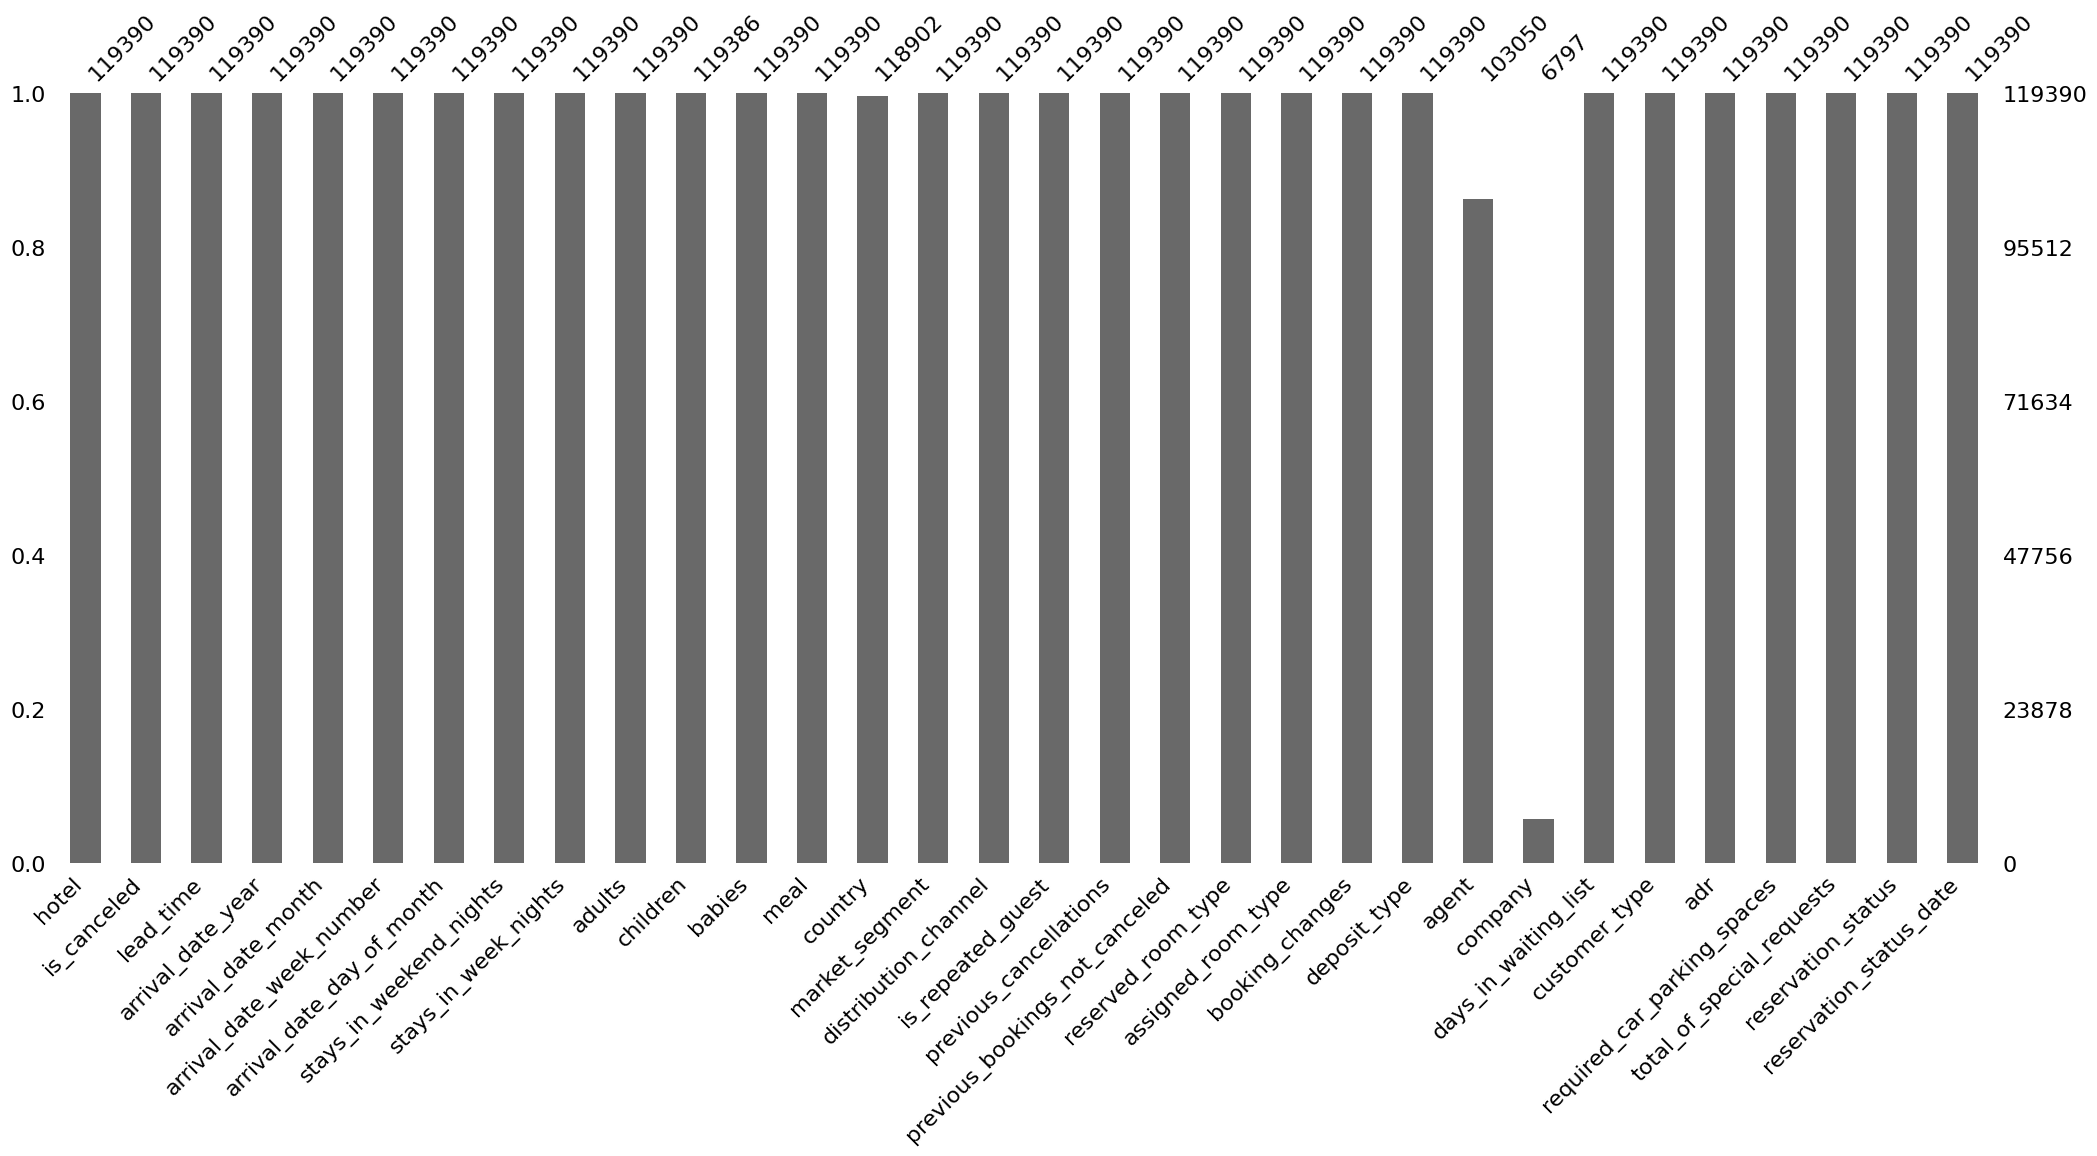

In [4]:
import missingno as msno
NaN = pd.DataFrame({'Null_instances' : raw_data.isnull().sum(), 'Null_instances_perc' : (raw_data.isnull().sum()/raw_data.shape[0]) * 100})
msno.bar(raw_data)

<AxesSubplot:>

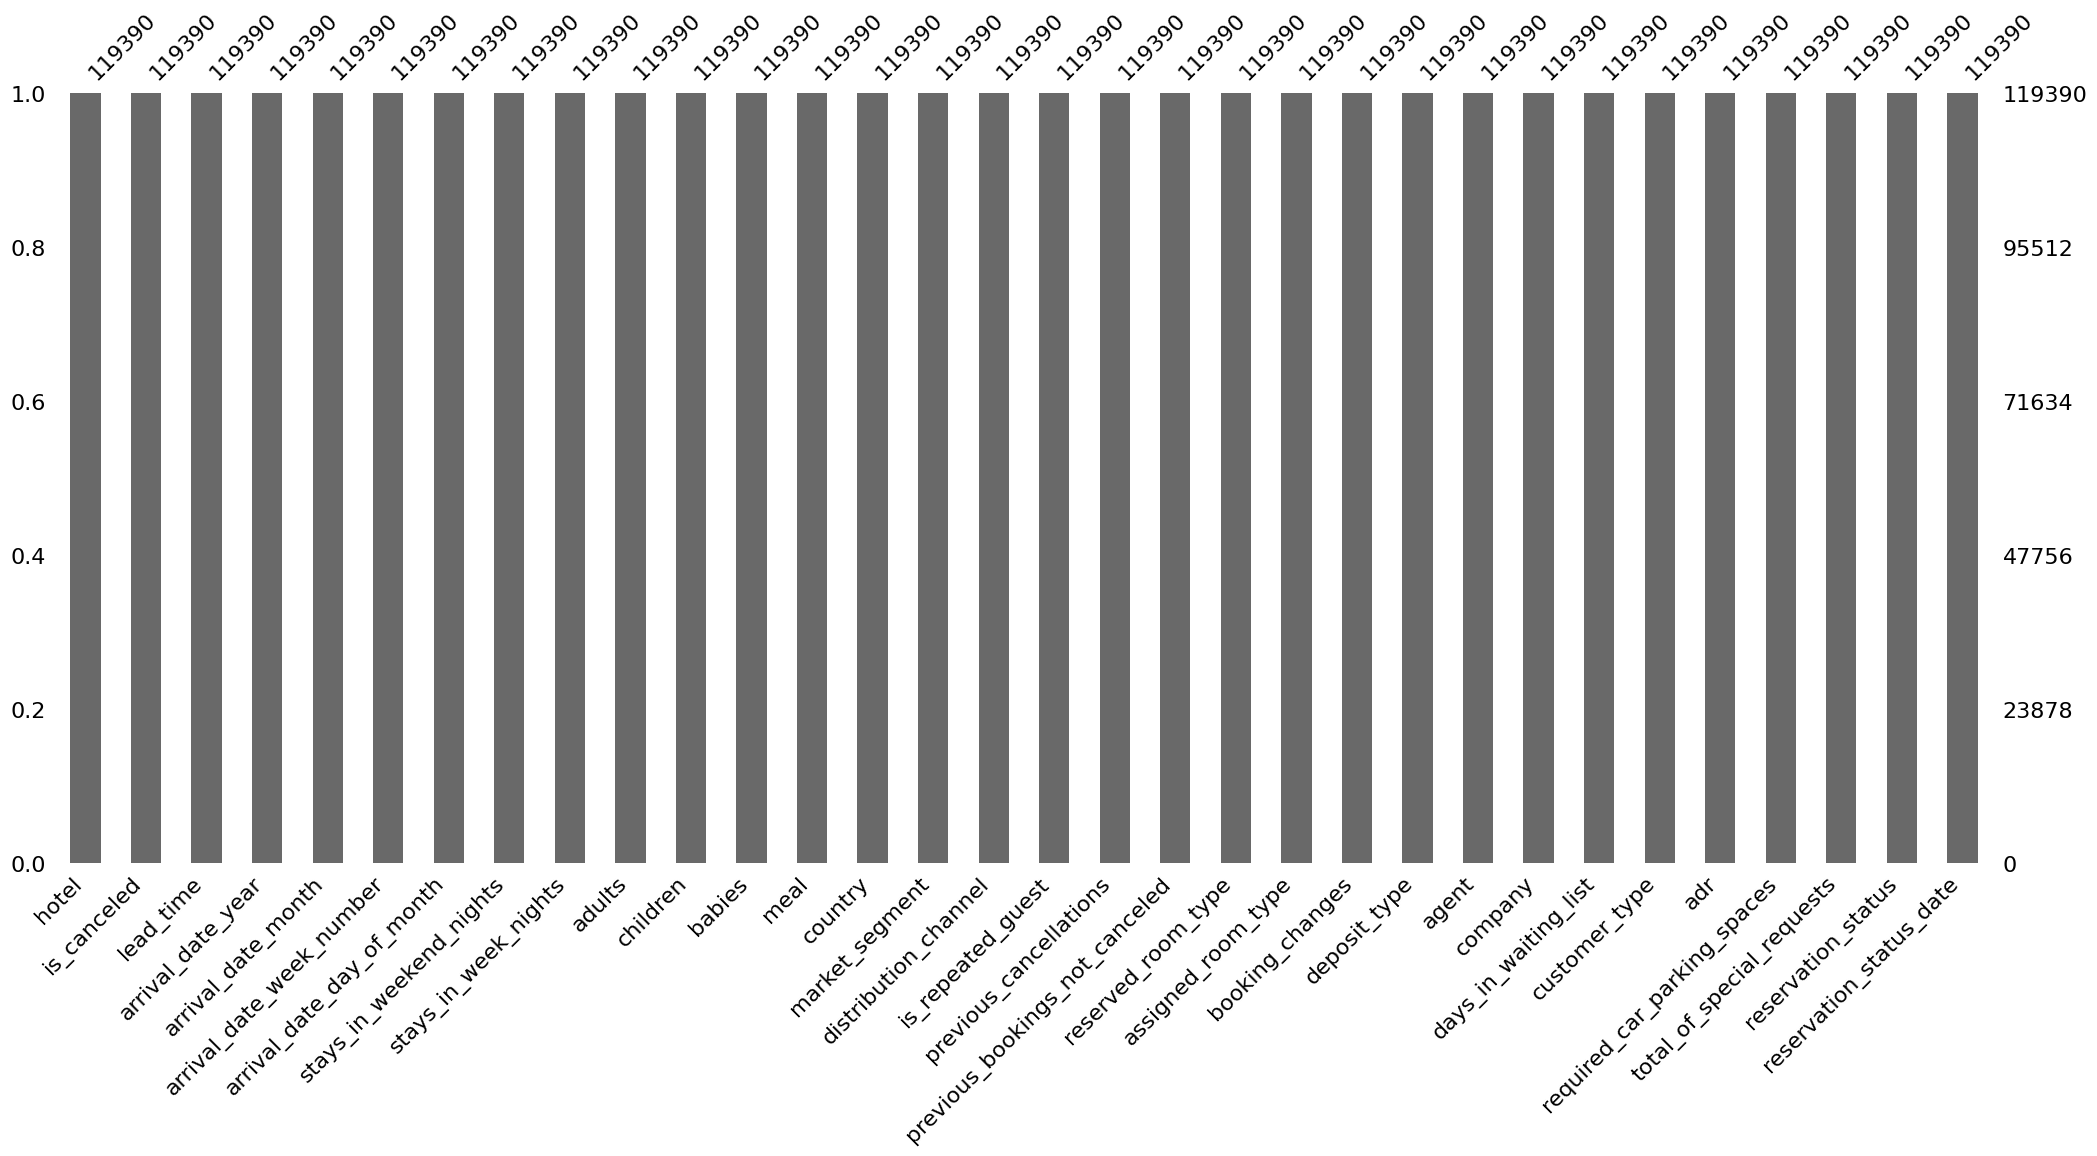

In [5]:
data = raw_data.fillna(0)
msno.bar(data)

In [6]:
data = data[~((data.adults==0) & (data.children==0) & (data.babies==0))]

# EDA - Exploratory Data Analysis

Heat map of guests origin

In [12]:
import plotly.express as px
country_guests = data[data.is_canceled==0].country.value_counts().reset_index()
country_guests.columns = ['country', 'num_guests']
fig = px.choropleth(country_guests, locations=country_guests.country,
                    color=country_guests.num_guests, hover_name=country_guests.country, width=800, height=400)
fig.show()


Average Daily Rate (adr) based on type of Hotel and reserved room type

In [15]:
data_no_canceled = data[data.is_canceled==0]
fig = px.box(data_no_canceled, x='reserved_room_type',
             y='adr', color='hotel', width=1000, height=500)
fig.show()


Evolution of price per night throughout the year

In [9]:
index = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
data_resort = pd.DataFrame(data_no_canceled[data_no_canceled.hotel=='Resort Hotel'].groupby(data_no_canceled.arrival_date_month).adr.mean(), index=index).reset_index()
data_city = pd.DataFrame(data_no_canceled[data_no_canceled.hotel=='City Hotel'].groupby(data_no_canceled.arrival_date_month).adr.mean(), index=index).reset_index()
data_resort.columns = ['arrival_date_month', 'adr_resort']
data_city.columns = ['arrival_date_month', 'adr_city']
data_merged = data_resort.merge(data_city, on='arrival_date_month')
data_merged

,arrival_date_month,adr_resort,adr_city
0,January,48.761125,82.330983
1,February,54.147478,86.520062
2,March,57.056838,90.658533
3,April,75.867816,111.962267
4,May,76.657558,120.669827
5,June,107.974850,117.874360
6,July,150.122528,115.818019
7,August,181.205892,118.674598
8,September,96.416860,112.776582
9,October,61.775449,102.004672


In [11]:
fig = px.line(data_merged, x='arrival_date_month', y=[
              'adr_resort', 'adr_city'], title='Room price per Night throughout a year', width=800, height=400)
fig.show()


In [48]:
year_resort = data_no_canceled[data_no_canceled.hotel=='Resort Hotel'].groupby(data_no_canceled.arrival_date_year).adr.mean().reset_index()
year_city = data_no_canceled[data_no_canceled.hotel == 'City Hotel'].groupby(data_no_canceled.arrival_date_year).adr.mean().reset_index()
year = year_resort.merge(year_city, on='arrival_date_year')
year.columns = ['year', 'adr_resort', 'adr_city']
fig = px.line(year, x='year', y=['adr_resort','adr_city'], width=800, height=400)
fig.show()


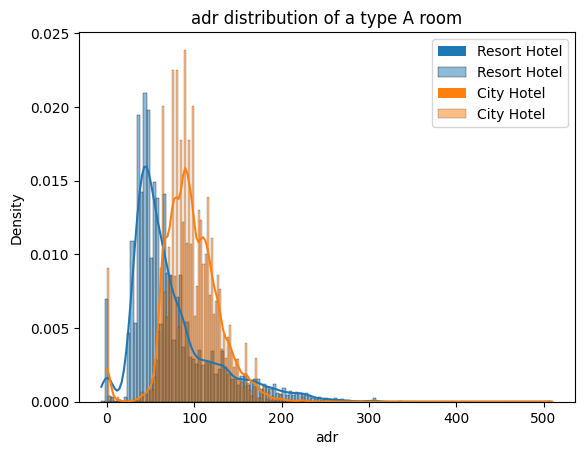

In [59]:
city_hotel_A = data_no_canceled[(data_no_canceled.reserved_room_type == 'A') & (data_no_canceled.hotel=='City Hotel')].adr
resort_hotel_A = data_no_canceled[(data_no_canceled.reserved_room_type == 'A') & (
    data_no_canceled.hotel == 'Resort Hotel')].adr
sns.histplot(resort_hotel_A, kde=True, label='Resort Hotel', stat='density')
sns.histplot(city_hotel_A, kde=True, label='City Hotel', stat='density')
plt.title('adr distribution of a type A room')
plt.legend()
plt.show()


In [64]:
data_no_canceled.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,0.0,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,0.0,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
sns.pairplot(data_no_canceled, hue='reserved_room_type', vars=['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'previous_cancellations'], kind='kde')